In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#plot
plt.rcParams['figure.figsize'] = (12, 9)


# Importation des données

In [2]:
df = pd.read_csv('Train.csv')

# Exploration et analyse de données :


In [3]:
df.shape


(104867, 36)

In [4]:
df.sample(10)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
35377,ID_3390548202,Montenegro,Europe & Central Asia (excluding high income),5.090316e+05,24.0,1,1.0,2.0,2.0,1.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,1
61610,ID_5887947849,"Iran, Islamic Rep.",Middle East & North Africa (excluding high inc...,6.127271e+07,35.0,1,1.0,1.0,1.0,1.0,...,1,2,NaN,2,2,NaN,1.0,1.0,NaN,1
40302,ID_3863066060,Bulgaria,Europe & Central Asia (excluding high income),6.123296e+06,37.0,1,1.0,2.0,2.0,2.0,...,2,1,2.0,2,2,2.0,NaN,1.0,1.0,1
33939,ID_3256924515,China,East Asia & Pacific (excluding high income),1.134634e+09,57.0,2,NaN,NaN,NaN,NaN,...,2,2,NaN,2,2,2.0,2.0,1.0,1.0,1
89216,ID_8517331279,Pakistan,South Asia,1.257942e+08,35.0,2,NaN,NaN,NaN,NaN,...,2,2,NaN,2,2,2.0,2.0,1.0,2.0,1
48080,ID_4594283893,Hungary,High income: nonOECD,8.408621e+06,21.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,2,2,3.0,NaN,1.0,1.0,1
14093,ID_1344396918,West Bank and Gaza,Middle East & North Africa (excluding high inc...,2.738738e+06,71.0,2,NaN,NaN,NaN,NaN,...,2,2,NaN,2,2,2.0,2.0,2.0,NaN,1
102195,ID_9742177274,"Venezuela, RB",Latin America & Caribbean (excluding high income),2.276236e+07,42.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,2,2,2.0,2.0,1.0,1.0,0
102219,ID_9744746254,Morocco,Middle East & North Africa (excluding high inc...,2.555017e+07,32.0,2,NaN,NaN,NaN,NaN,...,2,2,NaN,2,2,2.0,2.0,1.0,1.0,0
21160,ID_2023009034,Lao PDR,East Asia & Pacific (excluding high income),4.509951e+06,65.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,2,2,1.0,NaN,1.0,2.0,1


DEFINITIONS DES VARIABLES:

For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer.

Q1,Has ATM/debit card,
Q2,Is the ATM connect to an account with your name?,
Q3,Purchased with the ATM,
Q4,Use of mobile or internet to make payments or send money,
Q7,Used the credit card in 12 months,
Q8,Money deposits to a bank account in the last 12 months,
Q9,Money withdrawals from a bank account in the last 12 months,
Q10a,Used the Internet in the last 12 months;- to make payments for the bills -,
Q15,Borrowed money for health/medical purposes in the last 12 months,
Q19,Sent/given money to friend/relative,
Q20,Received money from friend or relative,
Q21,"Payments for electricity, water, or trash in the last 12 months",
Q23,Employed by government or public sector -12 months,
Q24,Received any form of financial support from the government,
Q25,Pension in the last 12 months,
Q27,Received money from your business in last 12 months,
owns_mobile,Owns a mobile phone,

Pour les autres questions voir: README.md


pourcentages des valeurs manquantes(NAN) dans notre dataframe :


In [5]:
(df.isna().sum()/df.shape[0]).sort_values()

ID             0.000000
Q25            0.000000
Q24            0.000000
Q22            0.000000
Q21            0.000000
Q17b           0.000000
Q17a           0.000000
Q16            0.000000
Q15            0.000000
Q14            0.000000
Q13a           0.000000
Q11            0.000000
Q10b           0.000000
Q10a           0.000000
Q12            0.000000
target         0.000000
Q6             0.000000
country        0.000000
population     0.000000
Q1             0.000000
owns_mobile    0.000010
age            0.002737
region         0.006475
Q26            0.230511
Q20            0.230511
Q19            0.230511
Q28            0.295660
Q9             0.437106
Q8             0.437106
Q27            0.442828
Q4             0.452211
Q5             0.452211
Q2             0.544938
Q3             0.568844
Q23            0.641641
Q7             0.803170
dtype: float64

Elimination des colonnes avec NAN >0.8 et les colonnes ID et population.


In [7]:

df = df[df.columns[df.isna().sum()/df.shape[0]<0.8]]

df = df.drop(['ID','population'],axis=1)

df.head()

,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,Lebanon,Middle East & North Africa (excluding high inc...,4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,Morocco,Middle East & North Africa (excluding high inc...,25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [16]:
#compter le nombre des repetitions
df['country'].value_counts()

Morocco                3514
China                  2357
India                  2036
Russian Federation     1310
Cambodia               1114
                       ... 
Georgia                 600
Turkmenistan            596
Azerbaijan              563
Trinidad and Tobago     329
Haiti                   320
Name: country, Length: 144, dtype: int64

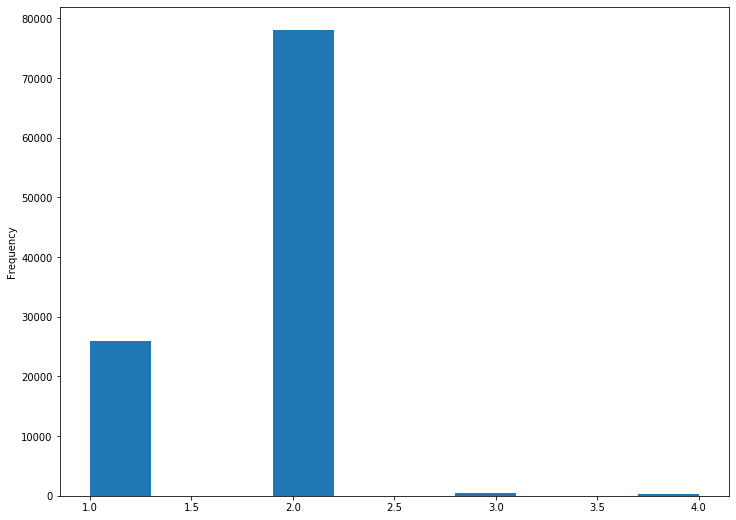

In [19]:
df.Q13a.plot.hist(10000)

la plus part a repondu NON à la question: Épargner l'argent dans une banque/institutions financières

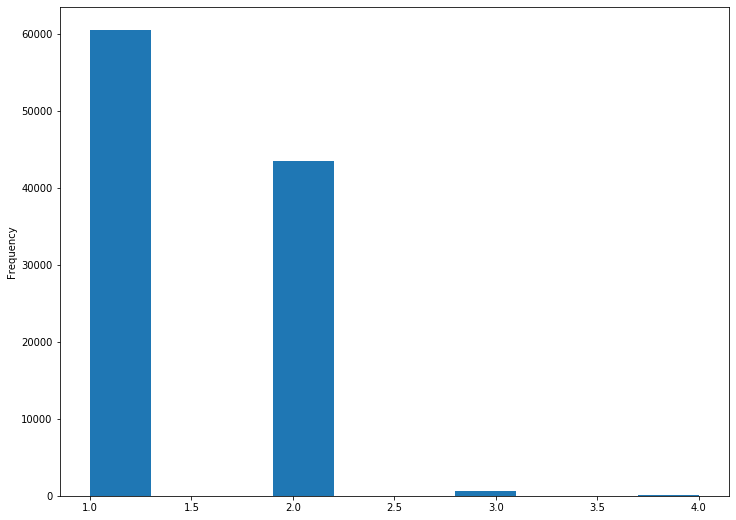

In [20]:
df.Q21.plot.hist(10000)

Plus que 60000 ont repondu par OUI à la question: Q21, "Paiements pour l'électricité, l'eau ou les ordures au cours des 12 derniers mois",

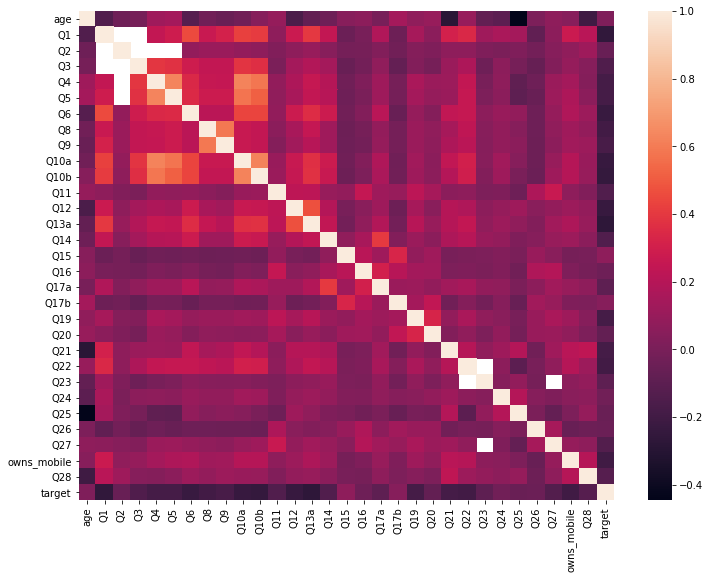

In [27]:
# la correlation entre les colonnes
sns.heatmap(df.corr())

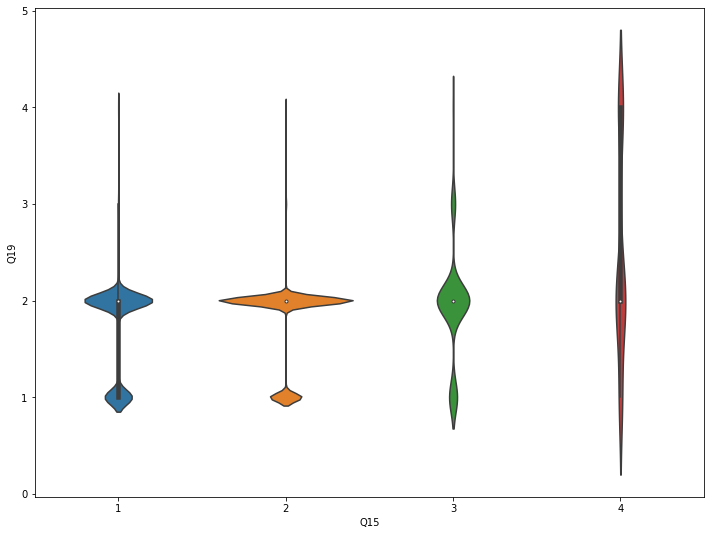

In [30]:
sns.violinplot(x = 'Q15',y = 'Q19',data= df)

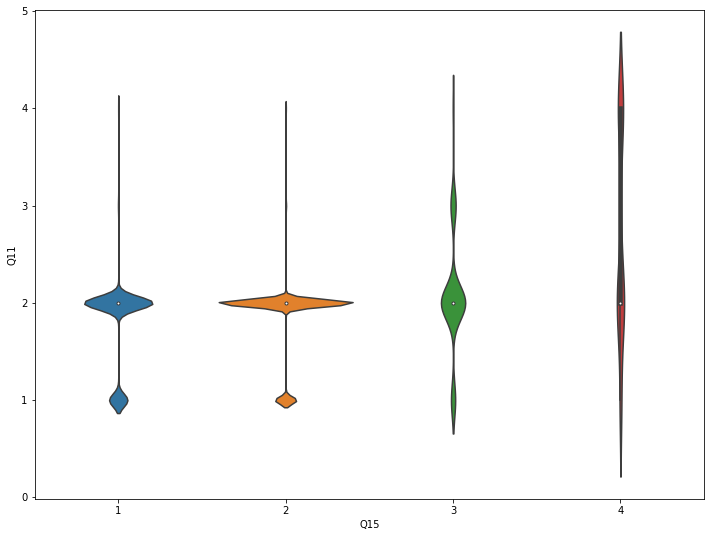

In [31]:
sns.violinplot(x = 'Q15',y = 'Q11',data= df)

Q11 Savings in the last 12 months to start a business/farm

In [35]:
df.groupby('Q11').target.mean()

Q11
1    0.755222
2    0.553724
3    0.385993
4    0.649123
Name: target, dtype: float64

#commentaire:
75% qui ont repondu oui à la qst 11 ce sont des individus financièrement résilients

Q15,Borrowed money for health/medical purposes in the last 12 months,

In [36]:
df.groupby('Q15').target.mean()

Q15
1    0.463604
2    0.596140
3    0.396146
4    0.536424
Name: target, dtype: float64

Q8,Money deposits to a bank account in the last 12 months,


In [37]:
df.groupby('Q8').target.mean()

Q8
1.0    0.749355
2.0    0.518637
3.0    0.556604
4.0    0.715328
Name: target, dtype: float64

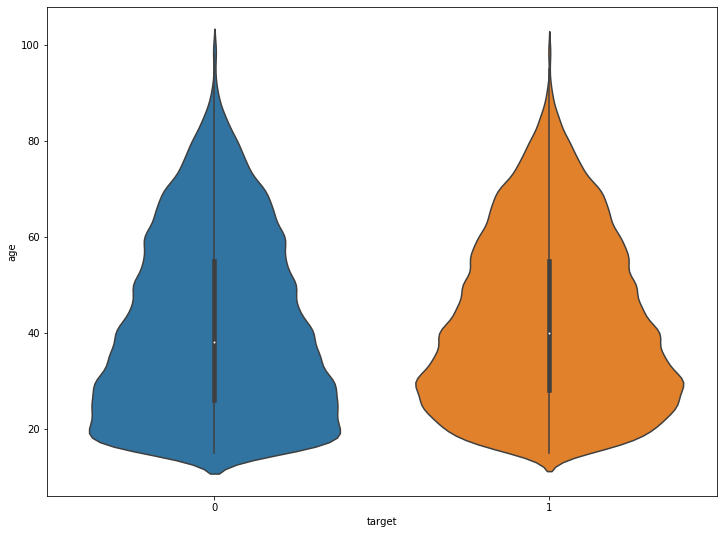

In [38]:
#distribution de l'age selon target
sns.violinplot(x='target',y='age',data = df)


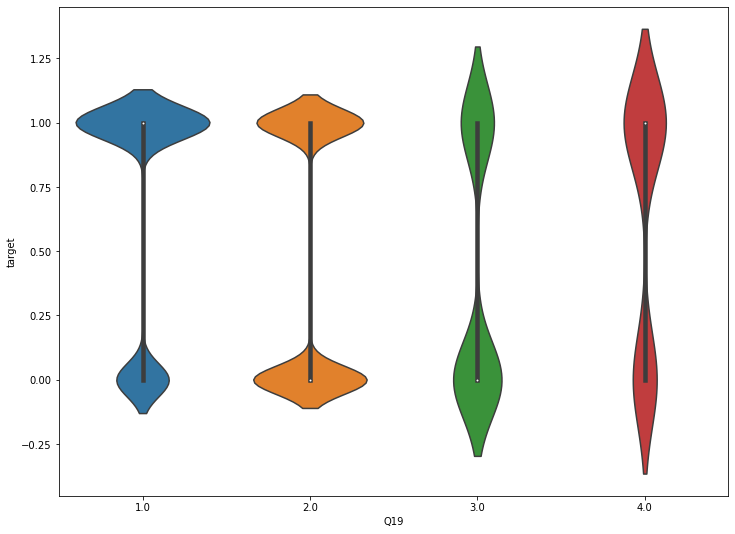

In [41]:
#distribution du qst 19 selon target
#Q19 Sent/given money to friend/relative,
sns.violinplot(y='target',x='Q19',data = df)

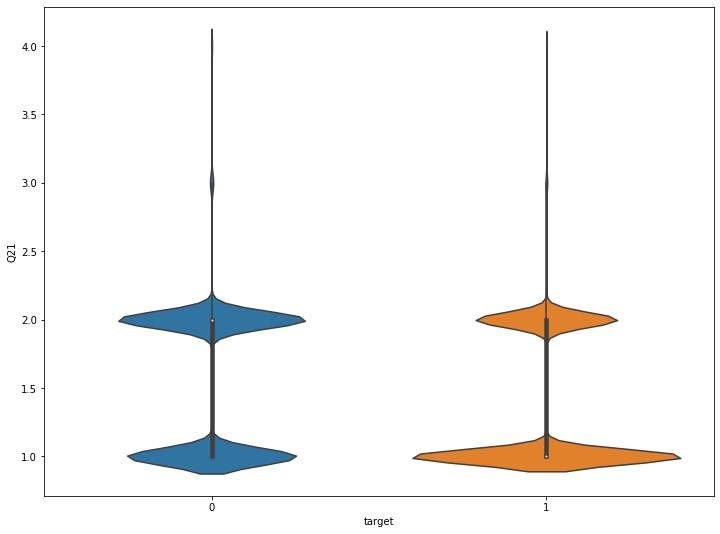

In [42]:
#distribution du qst 21 selon target
#Q21,"Payments for electricity, water, or trash in the last 12 months",
sns.violinplot(x='target',y='Q21',data = df)

In [45]:
la correlation entre target les variables

In [46]:
df.corr()[['target']].T

,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10a,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
target,0.02198,-0.258509,-0.060496,-0.145656,-0.18383,-0.182326,-0.227099,-0.19173,-0.173636,-0.23244,...,-0.185826,-0.197286,-0.091015,-0.024796,-0.05387,-0.049123,-0.133749,-0.198927,-0.118289,1.0


# Nettoyage de NAN

In [ ]:
le nombre des NAN par colonne

In [18]:
df.isnull().sum()

country            0
region             0
age                0
Q1                 0
Q2             57146
Q3             59653
Q4             47422
Q5             47422
Q6                 0
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q23            67287
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

remlacant les ages manquants par la moyenne,
et les regions qui manquent par le mot 'inkonnu'

In [14]:
df.loc[df['region'].isna(), 'region'] = 'inkonnu'
df.loc[df['age'].isna(), 'age'] = df['age'].mean()

on va remplacer les NAN dans les questions 1 jusqu'à 28 par 3=Don’t Know

In [68]:
df = df.fillna(3)

In [69]:
#les NAN par colonnes
df.isnull().sum()

country        0
region         0
age            0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q8             0
Q9             0
Q10a           0
Q10b           0
Q11            0
Q12            0
Q13a           0
Q14            0
Q15            0
Q16            0
Q17a           0
Q17b           0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
owns_mobile    0
Q28            0
target         0
dtype: int64

In [71]:
df.head()

,country,region,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,Morocco,Middle East & North Africa (excluding high inc...,66.0,2,3.0,3.0,3.0,3.0,2,3.0,...,1,2,3.0,1,2,2.0,2.0,1.0,1.0,0
1,Lebanon,Middle East & North Africa (excluding high inc...,44.0,2,3.0,3.0,2.0,2.0,2,1.0,...,1,2,3.0,2,2,2.0,1.0,1.0,1.0,1
2,Morocco,Middle East & North Africa (excluding high inc...,29.0,1,1.0,1.0,2.0,2.0,2,1.0,...,1,1,2.0,2,2,2.0,3.0,1.0,1.0,0
3,Canada,High income: OECD,44.0,1,1.0,1.0,1.0,1.0,2,1.0,...,1,1,2.0,1,2,3.0,3.0,1.0,3.0,1
4,Mexico,Latin America & Caribbean (excluding high income),36.0,2,3.0,3.0,3.0,3.0,2,3.0,...,1,2,3.0,1,2,2.0,2.0,1.0,1.0,1


# convertir les colonnes catégorielles en colonnes numériques

In [73]:
from sklearn.preprocessing import OneHotEncoder

CATEGORICAL_FEATURES = ['region','country']
cat_df = df[CATEGORICAL_FEATURES].copy()
cat_df

,region,country
0,Middle East & North Africa (excluding high inc...,Morocco
1,Middle East & North Africa (excluding high inc...,Lebanon
2,Middle East & North Africa (excluding high inc...,Morocco
3,High income: OECD,Canada
4,Latin America & Caribbean (excluding high income),Mexico
...,...,...
104862,South Asia,India
104863,High income: nonOECD,"Hong Kong SAR, China"
104864,Sub-Saharan Africa (excluding high income),Mauritius
104865,High income: OECD,Germany


In [74]:
#Encodage on utilisant onehotencoder
from sklearn.preprocessing import OneHotEncoder

CATEGORICAL_FEATURES = ['country', 'region']
cat_df = df[CATEGORICAL_FEATURES].copy()
cat_df

one_hot_encoder = OneHotEncoder(drop='first')
cat_features = one_hot_encoder.fit_transform(cat_df).todense()
df_1 = pd.DataFrame(cat_features, columns=one_hot_encoder.get_feature_names())

In [76]:
df_1.head(10)

,x0_Albania,x0_Algeria,x0_Argentina,x0_Armenia,x0_Australia,x0_Austria,x0_Azerbaijan,x0_Bahrain,x0_Bangladesh,x0_Belarus,...,x0_Zambia,x0_Zimbabwe,x1_Europe & Central Asia (excluding high income),x1_High income: OECD,x1_High income: nonOECD,x1_Latin America & Caribbean (excluding high income),x1_Middle East & North Africa (excluding high income),x1_South Asia,x1_Sub-Saharan Africa (excluding high income),x1_inkonnu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_2 = df.drop(['country','region'],axis=1)

In [83]:
df = pd.concat([df_2,df_1],axis = 1)


In [84]:
df.sample(7)

,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10a,...,x0_Zambia,x0_Zimbabwe,x1_Europe & Central Asia (excluding high income),x1_High income: OECD,x1_High income: nonOECD,x1_Latin America & Caribbean (excluding high income),x1_Middle East & North Africa (excluding high income),x1_South Asia,x1_Sub-Saharan Africa (excluding high income),x1_inkonnu
82688,30.0,1,1.0,1.0,1.0,1.0,1,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70524,68.0,1,1.0,2.0,2.0,2.0,2,1.0,1.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8246,20.0,2,3.0,3.0,3.0,3.0,2,3.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73204,62.0,1,1.0,2.0,2.0,2.0,2,1.0,1.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58570,38.0,2,3.0,3.0,3.0,3.0,2,3.0,3.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99345,67.0,1,1.0,1.0,2.0,2.0,1,1.0,1.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24406,30.0,2,3.0,3.0,2.0,2.0,2,2.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creation du modele 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

In [113]:
df_test.shape

(26217, 182)

In [114]:
df_train.shape

(78650, 182)

# le modèle KNeighbors

In [115]:
X_train = df_train
y_train = df_train.target

X_test = df_test
y_test = df_test.target

In [116]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

model = KNeighborsClassifier()
baseline = DummyClassifier(strategy='most_frequent')

model.fit(X_train, y_train)
baseline.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [118]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     10990
           1       0.91      0.93      0.92     15227

    accuracy                           0.90     26217
   macro avg       0.90      0.90      0.90     26217
weighted avg       0.90      0.90      0.90     26217



In [119]:
print(classification_report(y_test, baseline.predict(X_test), zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10990
           1       0.58      1.00      0.73     15227

    accuracy                           0.58     26217
   macro avg       0.29      0.50      0.37     26217
weighted avg       0.34      0.58      0.43     26217



In [ ]:
accuracy de notre modele > accuracy du baseline modele

In [98]:
print("train score  ",model.score(X_train,y_train))
print("test score ",model.score(X_test,y_test))

train score   0.9456961220597584
test score  0.9025822939314185
